In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [76]:
# load data
df = pd.read_csv('../../results/qa.csv')

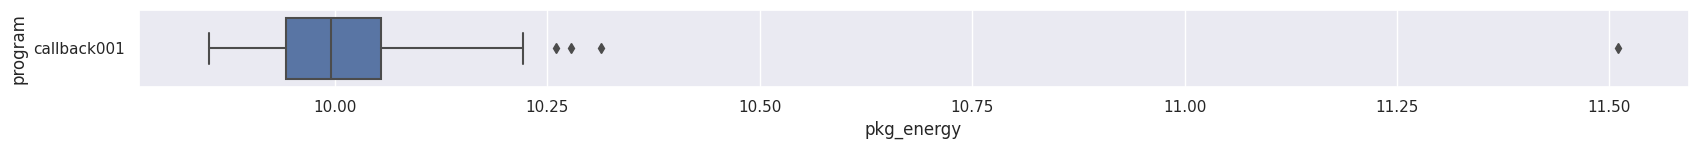

In [77]:
# visualize data
sns.set(rc = {'figure.figsize':(20,1)})
sns.boxplot(data=df, y='program', x='pkg_energy')
plt.show()


In [78]:
# remove outliers
# https://www.askpython.com/python/examples/detection-removal-outliers-in-python

col = 'pkg_energy'

q75, q25 = np.percentile(df.loc[:,col],[75,25])
intr_qr = q75 - q25

max = q75 + (1.5 * intr_qr)
min = q25 - (1.5 * intr_qr)

df.loc[df[col] < min,col] = np.nan
df.loc[df[col] > max,col] = np.nan

outliers_count = df[col].isnull().sum()

# remove outliers
df = df.dropna(axis=0)

print(f'Found {outliers_count} outliers in column \'{col}\'')

Found 4 outliers in column 'pkg_energy'


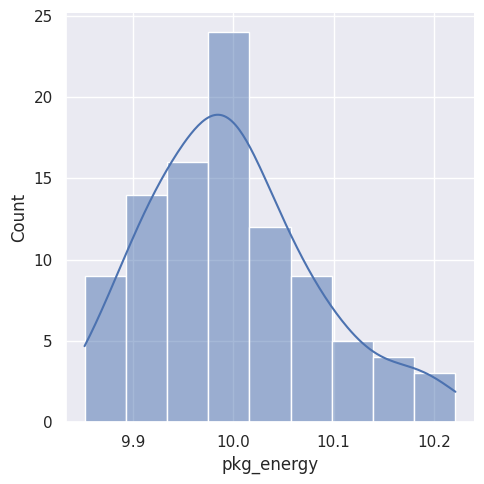

In [79]:
# Histogram with KDE

sns.displot(df, x='pkg_energy', kde=True)
plt.show()

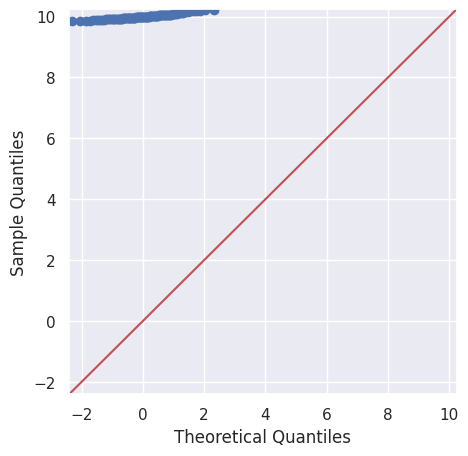

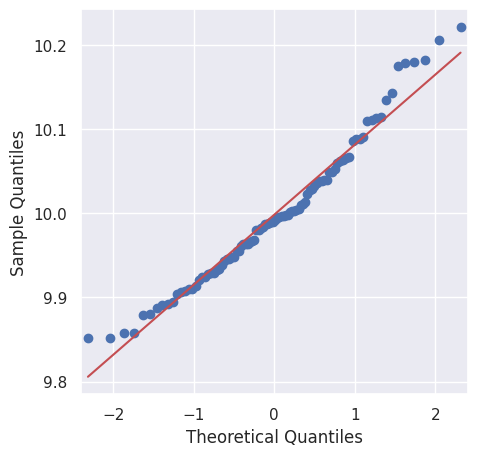

In [80]:
# Q-Q Plots
sns.set(rc = {'figure.figsize':(5,5)})

# 45 degree line
sm.qqplot(df['pkg_energy'], line='45')

# standardized line
sm.qqplot(df['pkg_energy'], line='s')
plt.show()